# Machine Learning - Assignment 3

## Artificial Neural Network

The aim of the assignment is to implement an artificial neural network (mostly) from scratch. This includes implementing or fixing the following:

* Add support for additional activation functions and their derivatives.
* Add support for loss functions and their derivative.
* Add the use of a bias in the forward propagation.
* Add the use of a bias in the backward propagation.

In addition, you will be doing the following as well:

* Test the algorithm on 3 datasets.
* Compare neural networks with and without scaling.
* Hyper-parameter tuning.

The forward and backward propagation is made to work through a single layer, and are re-used multiple times to work for multiple layers.

Follow the instructions and implement what is missing to complete the assignment. Some functions have been started to help you a little bit with the implementation.

**Note:** You might need to go back and forth during your implementation of the code. The structure is set up to make implementation easier, you might find yourself going back and and forth to change something to make it easier later on.

## Assignment preparations

We help you out with importing the libraries.

**IMPORTANT NOTE:** You may not import any more libraries than the ones already imported!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# We set seed to better reproduce results later on.
np.random.seed(12345)

## Neural Network utility functions

### 1) Activation functions

Below is some setup for choosing activation function. Implement 2 additional activation functions, "ReLU" and one more of your choosing.

In [2]:
def relu(activations):
    return np.maximum(0, activations)

In [3]:
def sigmoid(activations):
	return np.divide(1, np.add(1, np.exp(-activations)))

In [4]:
def tanh(activations):
    return np.divide(np.subtract(np.exp(activations), np.exp(-activations)), np.add(np.exp(activations), np.exp(-activations)))

In [5]:
def isrlu(activations, alpha = 1):
    return np.where(np.greater_equal(activations, 0), activations, np.divide(activations, np.sqrt(np.add(1, np.multiply(alpha, np.square(activations))))))

In [6]:
# Activation functions
def activate(activations, selected_function = "None"):
    # if selected function is "None"
    y = activations
    if selected_function == "ReLU":
        # TODO: Implement the "ReLU" activation function
        y = relu(activations)
    elif selected_function == "Sigmoid":
        # TODO: Implement another activation function activation function of your own choice.
        y = sigmoid(activations)
    elif selected_function == "tanh":
        # TODO: Implement another activation function activation function of your own choice.
        y = tanh(activations)
    elif selected_function == "ISRLU":
        # TODO: Implement another activation function activation function of your own choice.
        y = isrlu(activations)
    return y

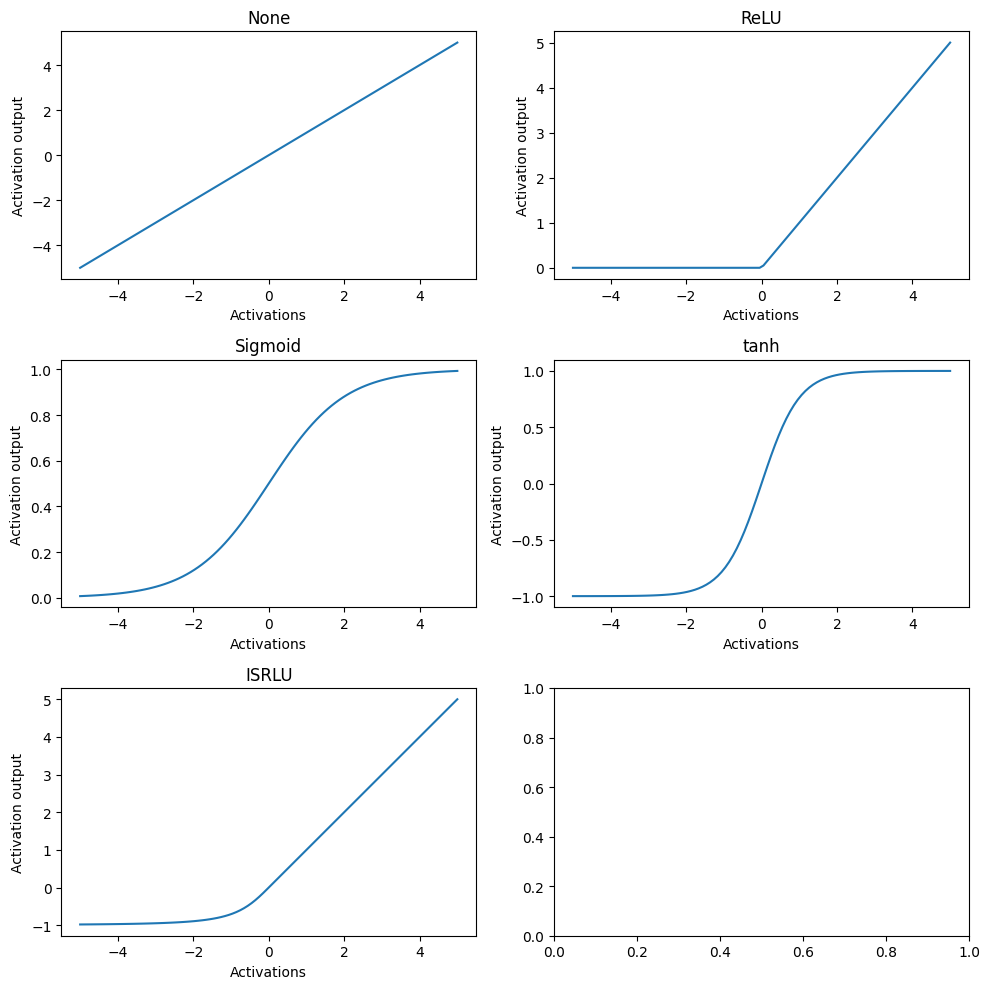

In [7]:
# TODO Test your activation functions, is the returning values what you expect?
activations = np.linspace(-5, 5, 100)
activation_functions = ["None", "ReLU", "Sigmoid", "tanh", "ISRLU"]

figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, activation_function in enumerate(activation_functions):
    y = activate(activations, selected_function=activation_function)
    axes[i].plot(activations, y)
    axes[i].set_title(activation_function)
    axes[i].set_xlabel("Activations")
    axes[i].set_ylabel("Activation output")

plt.tight_layout()
plt.show()

### 2) Activation function derivatives

Neural networks need both the activation function and its derivative. Finish the code below.

In [8]:
def d_relu(activations):
    return (activations > 0).astype(activations.dtype)

In [9]:
def d_sigmoid(activations):
    return np.multiply(sigmoid(activations), np.subtract(1, sigmoid(activations)))

In [10]:
def d_tanh(activations):
    return np.subtract(1, np.square(tanh(activations)))

In [11]:
def d_isrlu(activations):
    return np.where(np.greater_equal(activations, 0), 1, np.float_power(isrlu(activations), 3))

In [12]:
def d_activate(activations, selected_function = "None"):
    # if selected function is "d_None"
    dy = np.ones_like(activations)
    if selected_function == "ReLU":
        # TODO: Implement the "ReLU" derivative
        dy = d_relu(activations)
    elif selected_function == "Sigmoid":
        # TODO: Implement the derivative of the activation function you chose yourself.
        dy = d_sigmoid(activations)
    elif selected_function == "tanh":
        # TODO: Implement the derivative of the activation function you chose yourself.
        dy = d_tanh(activations)
    elif selected_function == "ISRLU":
        # TODO: Implement the derivative of the activation function you chose yourself.
        dy = d_isrlu(activations)
    return dy

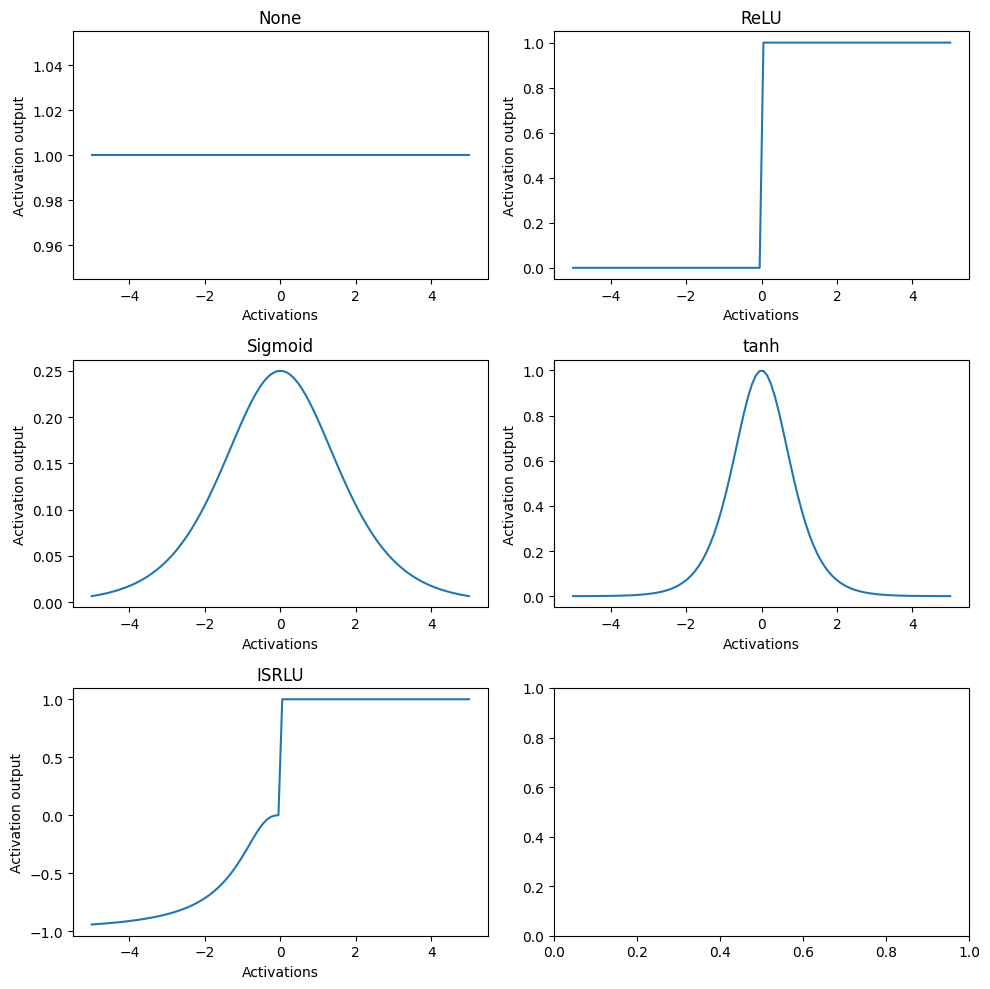

In [13]:
# TODO Test your activation function derivatives, is the returning values what you expect?
activation_functions = ["None", "ReLU", "Sigmoid", "tanh", "ISRLU"]

figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, activation_function in enumerate(activation_functions):
    y = d_activate(activations, selected_function=activation_function)
    axes[i].plot(activations, y)
    axes[i].set_title(activation_function)
    axes[i].set_xlabel("Activations")
    axes[i].set_ylabel("Activation output")

plt.tight_layout()
plt.show()

### 3) Loss functions

To penalize the network when it predicts incorrect, we need to meassure how "bad" the prediction is. This is done with loss-functions.

Similar as with the activation functions, the loss function needs its derivative as well.

Finish the MSE_loss (Mean Squared Error loss), as well as adding one additional loss function.

In [14]:
# This is the loss for a set of predictions y_hat compared to a set of real values y
def MSE_loss(y_hat, y):
    loss = np.mean(np.square(np.subtract(y_hat, y))) # TODO: Finish this function
    return loss

# TODO: Choose another loss function and implement it
def BCE_loss(y_hat, y):
    loss = -np.mean(np.add(np.multiply(y, np.log(y_hat)), np.multiply((np.subtract(1, y)), np.log(np.subtract(1, y_hat)))))  # TODO: Finish this function
    return loss

The derivatives of the loss is with respect to the predicted value **y_hat**.

In [15]:
def d_MSE_loss(y_hat, y):
    # TODO: Finish this function
    dy = np.multiply(2, np.divide(np.subtract(y_hat, y), y.size))
    return dy

# TODO: Choose another loss function and implement it
def d_BCE_loss(y_hat, y):
    # TODO: Finish this function
    epsilon = 1e-10
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    dy = np.add(np.divide(-y, y_hat), np.divide(np.subtract(1, y), np.subtract(1, y_hat)))
    return dy

### 4) Forward propagation

The first "fundamental" function for neural networks is to be able to propagate the data forward through the neural network. We will implement this function here.

In [16]:
def propagate_forward(weights, activations, bias, activation_function="None"):
    # TODO: Add support for the use of bias

    dot_product = np.dot(activations, weights) + bias
    new_activations = activate(dot_product, activation_function)
    return new_activations

### 5) Back-propagation

To be able to train a neural network, we need to be able to propagate the loss backwards and update the weights. We will implement this function here.

In [17]:
# Calculates the backward gradients that are passed throughout the layer in the backward pass.
# Returns both the derivative of the loss in respect to the weights and the input signal (activations).

def propagate_backward(weights, activations, dl_dz, bias, activation_function="None"):
    # NOTE: dl_dz is the derivative of the loss based on the previous layers activations/outputs

    # TODO: Add support for the use of bias

    dot_product = np.dot(activations, weights) + bias

    d_loss = d_activate(dot_product, activation_function) * dl_dz
    d_weights = np.dot(activations.T, d_loss)
    d_activations = np.dot(d_loss, weights.T)
    d_bias = np.sum(d_loss, axis=0, keepdims=True)

    return d_weights, d_activations, d_bias

## Neural network implementation

### 6) Fixing the neural network

Below is a class implementation of a MLP neural network. This implementation is still lacking several areas that are needed for the network to be robust and function well. Your task is to improve and fix it with the following:

1. Add a bias to the activation functions, and make sure the bias is also updated during training. 
2. Add a function that trains the network using minibatch (such that the neural network trains on a few samples at a time). 
3. Make use of an validation set in the training function. The model should stop training when the loss starts to increase for the validatin set. This feature should be able to be turned on and off to test the difference.


In [18]:
class NeuralNet(object):
    # Setup all parameters and activation functions.
    # This function runs directly when a new instance of this class is created.
    def __init__ (self, input_dim, output_dim, neurons = []):

        # NOTE: The "neurons" parameter is given as a list.
        # E.g., [4, 8, 4] means 4 neurons in layer 1, 8 neurons in layer 2 etc...

        # TODO: Add support for bias for each neuron in the code below.

        self.weights = [np.random.normal(0,2,(n,m)) for n,m in zip([input_dim] + neurons, neurons + [output_dim])]

        self.activation_functions = ["ReLU"] * len(neurons) + ["None"]

        self.biases = [np.zeros((1, n)) for n in (neurons + [output_dim])]

    # Predict the input throughout the network and calculate the output.
    def forward(self, x):

        # TODO: Add support for a bias for each neuron in the code below.
        for layer_weights, layer_bias, layer_activation_function in zip(
            self.weights,
            self.biases,
            self.activation_functions,
        ):
            x = propagate_forward(layer_weights, x, layer_bias, layer_activation_function)

        return x

    # Adjust the weights in the network to better fit the desired output (y), given the input (x).
    # The weight updates are happening "in-place", thus we are only returning the loss from this function.
    # Note that this function can handle a variable size of the input (x), both full datasets or smaller parts of the dataset.
    def adjust_weights(self, x, y, learning_rate=1e-4):

        # TODO: Add support for a bias for each neuron and make sure these are learnt as well in the code below.

        activation = x
        activation_history = [] # NOTE: We need the previous (or intermediate) activations to make use of the "chain rule" (see lecture notes).

        for layer_weights, layer_bias, layer_activation_function in zip(self.weights, self.biases, self.activation_functions):
            activation_history.append(activation)
            activation = propagate_forward(layer_weights, activation, layer_bias, layer_activation_function)

        # NOTE: The "activation" variable is changing as we go forward in the neural network.

        loss = MSE_loss(activation,y)
        d_activations = d_MSE_loss(activation,y) # NOTE: The final output can be "seen as" the final activations, thus the name.
        # loss = BCE_loss(activation,y)
        # d_activations = d_BCE_loss(activation,y) # NOTE: The final output can be "seen as" the final activations, thus the name.

        for i, (
            layer_weights,
            layer_bias,
            layer_activation_function,
            previous_activations,
        ) in reversed(
            list(
                enumerate(
                    zip(
                        self.weights,
                        self.biases,
                        self.activation_functions,
                        activation_history,
                    )
                )
            )
        ):

            d_weights, d_activations, d_bias = propagate_backward(layer_weights, previous_activations, d_activations, layer_bias, layer_activation_function)

            # NOTE: Here is where the weight update is happening.
            layer_weights -= learning_rate * d_weights
            layer_bias -= learning_rate * d_bias

            self.weights[i] = layer_weights
            self.biases[i] = layer_bias

        return loss

    # A function for the training of the network.
    def train_net(self, x, y, batch_size=32, epochs=100, learning_rate=1e-4, use_validation_data=False, early_stopping=2):
        losses = []
        accuracies = []
        # TODO: Add a training loop where the weights and biases of the network is learnt over several epochs.
        best_val_loss = float("inf")
        early_stop_cnt = 0
        if use_validation_data:
            X_train = x[: int(x.shape[0] * 0.8), :]
            y_train = y[: int(y.shape[0] * 0.8), :]

            X_val = x[X_train.shape[0] :]
            y_val = y[y_train.shape[0] :]
        else:
            X_train, y_train = x, y
        size = X_train.shape[0]
        for epoch in range(epochs):
            # TODO: Add support for mini batches. That is, in each epoch the data should be split into several
            #       smaller subsets and the model should be trained on each of these subsets one at a time.
            shuffle_idx = np.random.permutation(size)
            X_train = X_train[shuffle_idx, :]
            y_train = y_train[shuffle_idx, :]
            loss = 0
            accuracy = 0

            num_batches = X_train.shape[0] // batch_size

            X_batches = [
                X_train[i * batch_size : (i + 1) * batch_size]
                for i in range(num_batches)
            ]
            y_batches = [y_train[i * batch_size:(i + 1) * batch_size] for i in range(num_batches)]

            if X_train.shape[0] % batch_size != 0:
                X_batches = X_batches[:-1]
                y_batches = y_batches[:-1]

            for X_batch, y_batch in zip(X_batches, y_batches):
                loss += self.adjust_weights(X_batch, y_batch, learning_rate)
                y_pred = self.forward(X_batch)
                correct_pred = np.sum(y_batch == np.argmax(y_pred))
                accuracy += correct_pred / y_batch.shape[0]

            losses.append(loss / num_batches)
            accuracies.append(accuracy / num_batches)
            print(f"Epoch {epoch + 1} - Loss: {losses[epoch]}")
            if use_validation_data:
                # TODO: Implement the use of validation data, that is, splitting the training data into training data and validation data.
                #       The validation data should be used to stop the training when the model stops to generalize and starts to overfit.
                #       This feature should be able to be turned on and off to test the difference.
                y_val_pred = self.forward(X_val)
                val_loss = MSE_loss(y_val_pred, y_val)
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    early_stop_cnt = 0
                else:
                    early_stop_cnt += 1
                    if early_stop_cnt > early_stopping:
                        print(
                            f"### EARLY STOP - Validation loss did not improve for {early_stopping + 1} epochs! ###"
                        )
                        return losses
        # NOTE: Make use of previously implemented functions here.
        return losses, accuracies

## Train Neural Networks

### 7) Simple test

In this a very simple test for you to use and toy around with before using the datasets.

Make sure to test both the **adjust_weights** function and the **train_net** function. What is the difference between the two?

Also, be sure to **plot the loss for each epoch** to see how the network training is progressing!

Start Loss: 31365.825846180418 End Loss: 9.23322005255899

Epoch 1 - Loss: 2748.6299245693594
Epoch 2 - Loss: 195.90507357623704
Epoch 3 - Loss: 142.83366630191298
Epoch 4 - Loss: 117.75897329912577
Epoch 5 - Loss: 102.49074398524318
Epoch 6 - Loss: 88.73177975025014
Epoch 7 - Loss: 80.53732371095245
Epoch 8 - Loss: 72.37733483763932
Epoch 9 - Loss: 65.50559248806262
Epoch 10 - Loss: 60.197720416061095
Epoch 11 - Loss: 55.41402046464796
Epoch 12 - Loss: 52.00978854058419
Epoch 13 - Loss: 47.90903952687406
Epoch 14 - Loss: 45.10716384328734
Epoch 15 - Loss: 42.12679368122874
Epoch 16 - Loss: 39.687684148809474
Epoch 17 - Loss: 37.657598027875316
Epoch 18 - Loss: 35.786886087611634
Epoch 19 - Loss: 33.86600224555164
Epoch 20 - Loss: 31.82946398025254
Epoch 21 - Loss: 31.127228970617715
Epoch 22 - Loss: 29.378866320258748
Epoch 23 - Loss: 28.724281547493405
Epoch 24 - Loss: 27.27779486571477
Epoch 25 - Loss: 25.97600581449984
Epoch 26 - Loss: 25.571044700184288
Epoch 27 - Loss: 24.4169235

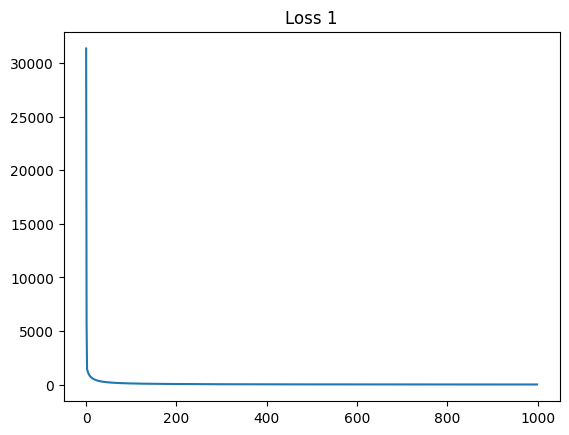

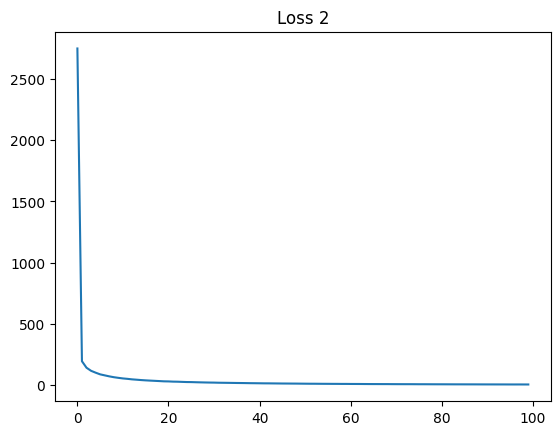

In [19]:
# TODO: You can change most things in this cell if you want to, we encourage it!

n = 1000
d = 4

k = np.random.randint(0,10,(d,1))
x = np.random.normal(0,1,(n,d))
y = np.dot(x,k) + 0.1 + np.random.normal(0,0.01,(n,1))

nn = NeuralNet(d, 1, [18, 12])

loss_1 = [nn.adjust_weights(x, y) for _ in range(1000)] 
print(f"Start Loss: {loss_1[0]} End Loss: {loss_1[-1]}\n")

nn2 = NeuralNet(d, 1, [18, 12])

loss_2, accuracies = nn2.train_net(
    x, y, epochs=100, use_validation_data=True, early_stopping=10
)  # TODO: Use the train_net function to compare with the "adjust_weights" function.

plt.plot(loss_1)
plt.title("Loss 1")
plt.show()

plt.plot(loss_2)
plt.title("Loss 2")
plt.show()

### Real test and preprocessing

When using real data and neural networks, it is very important to scale the data between smaller values, usually between 0 and 1. This is because neural networks struggle with larger values as input compared to smaller values. 

To test this, we will use our first dataset and test with and without scaling.

Similar as with assignment 2, we will use the scikit-learn library for this preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html

### 8) Dataset 1: Wine - with and without scaling

Wine dataset: https://archive.ics.uci.edu/dataset/109/wine

Train two neural network, one with scaling and one without. Are we able to see any difference in training results or loss over time?

**Note:** Do not train for to many epochs (more than maybe 50-100). The network might "learn" anyway in the end, but you should still be able to see a difference when training.

Neural Net 1:
Epoch 1 - Loss: 7.386320743398539e+74
Epoch 2 - Loss: 8.860040285294804e+67
Epoch 3 - Loss: 8.84941355155923e+67
Epoch 4 - Loss: 8.838799563529793e+67
Epoch 5 - Loss: 8.8281983059193e+67
Epoch 6 - Loss: 8.817609763458882e+67
Epoch 7 - Loss: 8.807033920897985e+67
Epoch 8 - Loss: 8.796470763004345e+67
Epoch 9 - Loss: 8.785920274563977e+67
Epoch 10 - Loss: 8.775382440381127e+67
Epoch 11 - Loss: 8.764857245278281e+67
Epoch 12 - Loss: 8.754344674096127e+67
Epoch 13 - Loss: 8.743844711693532e+67
Epoch 14 - Loss: 8.733357342947522e+67
Epoch 15 - Loss: 8.722882552753264e+67
Epoch 16 - Loss: 8.712420326024039e+67
Epoch 17 - Loss: 8.701970647691227e+67
Epoch 18 - Loss: 8.691533502704278e+67
Epoch 19 - Loss: 8.681108876030698e+67
Epoch 20 - Loss: 8.670696752656018e+67
Epoch 21 - Loss: 8.660297117583781e+67
Epoch 22 - Loss: 8.649909955835513e+67
Epoch 23 - Loss: 8.639535252450705e+67
Epoch 24 - Loss: 8.629172992486795e+67
Epoch 25 - Loss: 8.618823161019147e+67
Epoch 26 - Loss: 8.6084

/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Epoch 59 - Loss: 3.091594953184899
Epoch 60 - Loss: 2.984621995225495
Epoch 61 - Loss: 2.6045880458214947
Epoch 62 - Loss: 2.6226347445976956
Epoch 63 - Loss: 2.263482083643883
Epoch 64 - Loss: 1.8962568690872605
Epoch 65 - Loss: 2.1721384556602272
Epoch 66 - Loss: 2.230463759462467
Epoch 67 - Loss: 1.655977542693344
Epoch 68 - Loss: 1.5629416946466543
Epoch 69 - Loss: 1.540138011084665
Epoch 70 - Loss: 1.5139359309274227
Epoch 71 - Loss: 1.7385581659464648
Epoch 72 - Loss: 1.7454290524941327
Epoch 73 - Loss: 1.411516133680127
Epoch 74 - Loss: 1.571626428440554
Epoch 75 - Loss: 1.5206464418368542
Accuracy Neural Net 1: 0.3888888888888889
Accuracy Neural Net 2: 0.75
Accuracy of sklearn's MLPClassifier: 0.3333333333333333
Accuracy of sklearn's MLPClassifier with normalized data: 0.5555555555555556
Neural Net 1:
Epoch 1 - Loss: 1.0312919697655435e+83
Epoch 2 - Loss: 1.2370554590646659e+76
Epoch 3 - Loss: 1.2355717345491642e+76
Epoch 4 - Loss: 1.234089789613084e+76
Epoch 5 - Loss: 1.232609

/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Accuracy of sklearn's MLPClassifier with normalized data: 0.4444444444444444
Neural Net 1:
Epoch 1 - Loss: 2.3471449717659072e+83
Epoch 2 - Loss: 2.8154475993828386e+76
Epoch 3 - Loss: 2.812070751081735e+76
Epoch 4 - Loss: 2.8086979529730242e+76
Epoch 5 - Loss: 2.805329200198904e+76
Epoch 6 - Loss: 2.8019644879074e+76
Epoch 7 - Loss: 2.7986038112523566e+76
Epoch 8 - Loss: 2.7952471653934312e+76
Epoch 9 - Loss: 2.7918945454960857e+76
Epoch 10 - Loss: 2.788545946731582e+76
Epoch 11 - Loss: 2.7852013642769714e+76
Epoch 12 - Loss: 2.7818607933150924e+76
Epoch 13 - Loss: 2.7785242290345592e+76
Epoch 14 - Loss: 2.775191666629758e+76
Epoch 15 - Loss: 2.7718631013008386e+76
Epoch 16 - Loss: 2.7685385282537066e+76
Epoch 17 - Loss: 2.7652179427000194e+76
Epoch 18 - Loss: 2.7619013398571754e+76
Epoch 19 - Loss: 2.758588714948313e+76
Epoch 20 - Loss: 2.755280063202296e+76
Epoch 21 - Loss: 2.751975379853712e+76
Epoch 22 - Loss: 2.748674660142866e+76
Epoch 23 - Loss: 2.7453778993157674e+76
Epoch 24 

/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

Epoch 67 - Loss: 6.767157247078996e+26
Epoch 68 - Loss: 6.759040717594287e+26
Epoch 69 - Loss: 6.75093392307631e+26
Epoch 70 - Loss: 6.742836851848971e+26
Epoch 71 - Loss: 6.73474949225018e+26
Epoch 72 - Loss: 6.726671832631758e+26
Epoch 73 - Loss: 6.718603861359607e+26
Epoch 74 - Loss: 6.71054556681347e+26
Epoch 75 - Loss: 6.702496937387095e+26
Neural Net 2:
Epoch 1 - Loss: 34021.87758109373
Epoch 2 - Loss: 29.76301045925188
Epoch 3 - Loss: 14.133249952942514
Epoch 4 - Loss: 9.434904781737679
Epoch 5 - Loss: 7.025424908558374
Epoch 6 - Loss: 4.6123869261529125
Epoch 7 - Loss: 2.8821188166800598
Epoch 8 - Loss: 2.3905451593295246
Epoch 9 - Loss: 2.049245216120047
Epoch 10 - Loss: 1.7281169010142254
Epoch 11 - Loss: 1.684542632646295
Epoch 12 - Loss: 1.532791935346717
Epoch 13 - Loss: 1.4370424273062565
Epoch 14 - Loss: 1.2848928727292437
Epoch 15 - Loss: 1.2864723894102352
Epoch 16 - Loss: 1.0930742703023284
Epoch 17 - Loss: 1.0479981059154022
Epoch 18 - Loss: 0.9844541044033135
Epoch 

/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the 

Epoch 53 - Loss: 2.691829225485655e+70
Epoch 54 - Loss: 2.688600645081979e+70
Epoch 55 - Loss: 2.685375937038156e+70
Epoch 56 - Loss: 2.682155096709676e+70
Epoch 57 - Loss: 2.678938119457602e+70
Epoch 58 - Loss: 2.675725000648559e+70
Epoch 59 - Loss: 2.6725157356547298e+70
Epoch 60 - Loss: 2.6693103198538475e+70
Epoch 61 - Loss: 2.6661087486291887e+70
Epoch 62 - Loss: 2.6629110173695694e+70
Epoch 63 - Loss: 2.6597171214693353e+70
Epoch 64 - Loss: 2.656527056328354e+70
Epoch 65 - Loss: 2.653340817352013e+70
Epoch 66 - Loss: 2.6501583999512098e+70
Epoch 67 - Loss: 2.646979799542347e+70
Epoch 68 - Loss: 2.6438050115473222e+70
Epoch 69 - Loss: 2.640634031393527e+70
Epoch 70 - Loss: 2.637466854513836e+70
Epoch 71 - Loss: 2.634303476346601e+70
Epoch 72 - Loss: 2.6311438923356454e+70
Epoch 73 - Loss: 2.6279880979302576e+70
Epoch 74 - Loss: 2.6248360885851858e+70
Epoch 75 - Loss: 2.6216878597606257e+70
Neural Net 2:
Epoch 1 - Loss: 13211.34443849813
Epoch 2 - Loss: 55.29113808686687
Epoch 3 - 

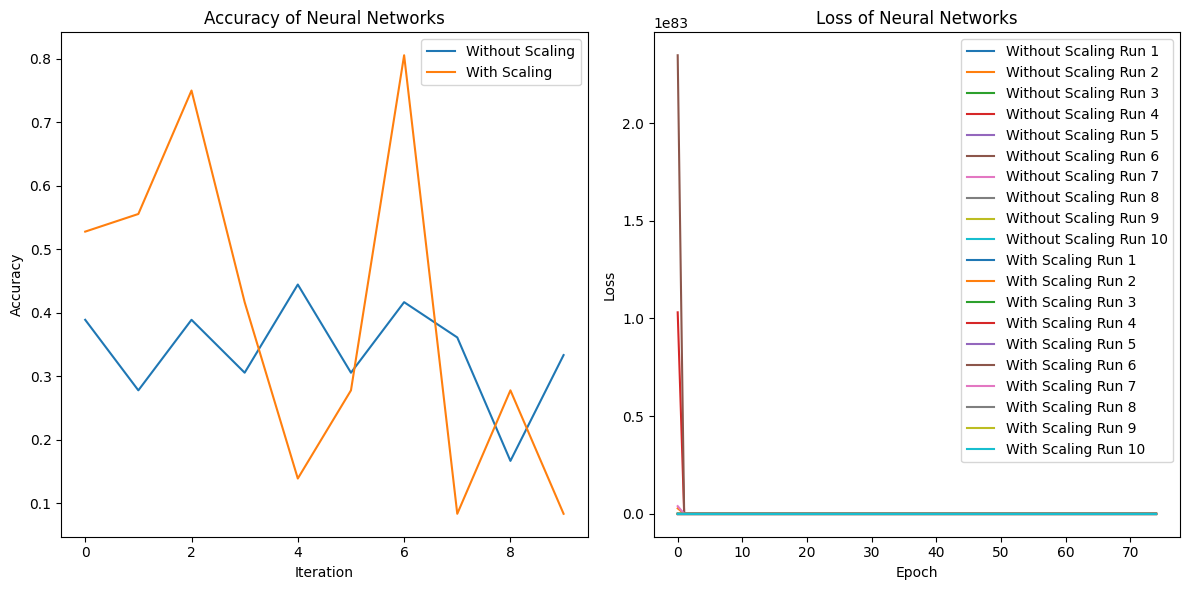

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

data_wine = pd.read_csv("wine.csv", skiprows=[1]).to_numpy()
features = data_wine[:, :-1]
labels = data_wine[:, -1:]

# Started with tripling the number of features which is 13
neurons = [39, 21]
accuracies_nn1 = []
accuracies_nn2 = []
accuracies_sk_nn1 = []
accuracies_sk_nn2 = []
losses_nn1 = []
losses_nn2 = []
RUNS = 10

# TODO: Do the above at least 3 times
# NOTE: Use loops here!
for _ in range(RUNS):
    # TODO: Set up the data and split it into train and test-sets.
    # TODO: Train and test your neural networks.
    # NOTE: Use the same train/test split for both neural network models!
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, train_size=0.8, shuffle=True
    )
    X_train_norm = preprocessing.normalize(X_train)
    X_test_norm = preprocessing.normalize(X_test)

    input_dim = len(X_train[0])
    output_dim = len(np.unique(y_train))

    nn1 = NeuralNet(input_dim=input_dim, output_dim=output_dim, neurons=neurons)
    nn2 = NeuralNet(input_dim=input_dim, output_dim=output_dim, neurons=neurons)

    print("Neural Net 1:")
    loss_1, _ = nn1.train_net(
        X_train, y_train, batch_size=32, epochs=75, use_validation_data=False, early_stopping=5
    )
    losses_nn1.append(loss_1)

    print("Neural Net 2:")
    loss_2, _ = nn2.train_net(
        X_train_norm,
        y_train,
        batch_size=32,
        epochs=75,
        use_validation_data=False,
        early_stopping=5,
    )
    losses_nn2.append(loss_2)

    y_pred = nn1.forward(X_test)
    y_pred = np.argmax(y_pred, axis=1) + 1
    accuracy_nn1 = accuracy_score(y_true=y_test, y_pred=y_pred)
    print("Accuracy Neural Net 1:", accuracy_nn1)
    accuracies_nn1.append(accuracy_nn1)

    y_pred_norm = nn2.forward(X_test_norm)
    y_pred_norm = np.argmax(y_pred_norm, axis=1) + 1
    accuracy_nn2 = accuracy_score(y_true=y_test, y_pred=y_pred_norm)
    print("Accuracy Neural Net 2:", accuracy_nn2)
    accuracies_nn2.append(accuracy_nn2)

    mlp = MLPClassifier(hidden_layer_sizes=(39, 21), max_iter=75)
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of sklearn's MLPClassifier:", accuracy)
    accuracies_sk_nn1.append(accuracy)

    mlp_norm = MLPClassifier(hidden_layer_sizes=(39, 21), max_iter=75)
    mlp_norm.fit(X_train_norm, y_train)

    y_pred_norm = mlp_norm.predict(X_test_norm)
    accuracy_norm = accuracy_score(y_test, y_pred_norm)
    print("Accuracy of sklearn's MLPClassifier with normalized data:", accuracy_norm)
    accuracies_sk_nn2.append(accuracy_norm)

print("Mean Accuracy Neural Net 1:", np.mean(accuracies_nn1))
print("Mean Accuracy Neural Net 2:", np.mean(accuracies_nn2))
print("Mean Accuracy Sklearn Neural Net 1:", np.mean(accuracies_sk_nn1))
print("Mean Accuracy Sklearn Neural Net 2:", np.mean(accuracies_sk_nn2))

# TODO: Plot the results with matplotlib (plt)
# NOTE: One combined lineplot with the scaling and one without the scaling, 2 plots in total.
# NOTE: Plot both the accuracy and the loss!
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(accuracies_nn1, label="Without Scaling")
plt.plot(accuracies_nn2, label="With Scaling")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy of Neural Networks")
plt.legend()

plt.subplot(1, 2, 2)
for i, loss in enumerate(losses_nn1):
    plt.plot(loss, label=f"Without Scaling Run {i+1}")
for i, loss in enumerate(losses_nn2):
    plt.plot(loss, label=f"With Scaling Run {i+1}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of Neural Networks")
plt.legend()

plt.tight_layout()
plt.show()

### Real data and hyper-parameter tuning

Now we are going to use real data, preprocess it, and do hyper-parameter tuning.

Choose two hyper-parameters to tune to try and achive an even better result.

**NOTE:** Changing the number of epochs should be part of the tuning, but it does not count towards the two hyper parameters.

### 9) Dataset 2: Mushroom

Mushroom dataset: https://archive.ics.uci.edu/dataset/73/mushroom

Note: This dataset has one feature with missing values. Remove this feature.

/home/joel/.local/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


My Neural Net:
Epoch 1 - Loss: 1685.1476835053645
Epoch 2 - Loss: 5.749406854548567
Epoch 3 - Loss: 5.256485723719529
Epoch 4 - Loss: 4.98292643495653
Epoch 5 - Loss: 4.8032696111622775
Epoch 6 - Loss: 4.650359573698021
Epoch 7 - Loss: 4.527174054737927
Epoch 8 - Loss: 4.399623534557423
Epoch 9 - Loss: 4.333562510394383
Epoch 10 - Loss: 4.225434753030961
Epoch 11 - Loss: 4.136552427003001
Epoch 12 - Loss: 4.055340241905902
Epoch 13 - Loss: 3.9967992205836023
Epoch 14 - Loss: 3.9498378327220576
Epoch 15 - Loss: 3.8668170412505827
Epoch 16 - Loss: 3.8087259762703285
Epoch 17 - Loss: 3.773590026113939
Epoch 18 - Loss: 3.7144661523285474
Epoch 19 - Loss: 3.6566420150395373
Epoch 20 - Loss: 3.6231100217821486
Epoch 21 - Loss: 3.59164776792897
Epoch 22 - Loss: 3.5448868715499553
Epoch 23 - Loss: 3.5110799607009224
Epoch 24 - Loss: 3.455415504040726
Epoch 25 - Loss: 3.4299176498706685
Epoch 26 - Loss: 3.4153451416400387
Epoch 27 - Loss: 3.379438625181557
Epoch 28 - Loss: 3.354615057151481
Epo

/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of sklearn's MLPClassifier: 0.6018461538461538


/home/joel/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(


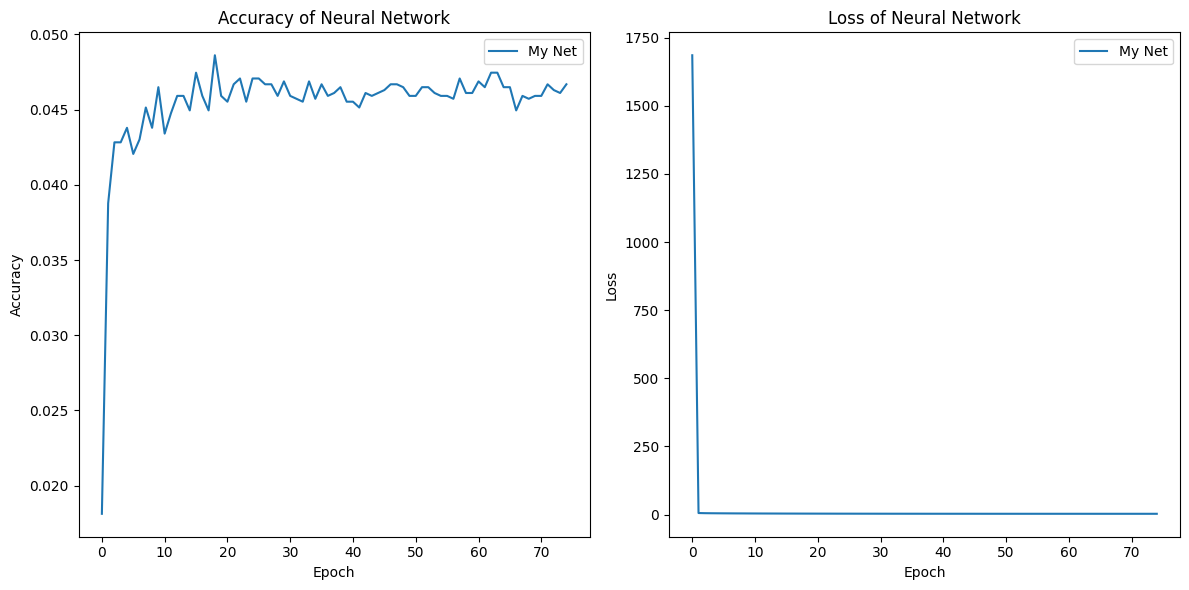

In [21]:
# TODO: Preprocess the data.
data_mushroom = (
    pd.read_csv("mushroom.csv", delimiter=",", na_values="?").dropna(axis=1).to_numpy()
)

features = data_mushroom[:, :-1]
labels = data_mushroom[:, -1:]

enc = preprocessing.OneHotEncoder(sparse_output=False)
enc_features = enc.fit_transform(features)

label_encoder = preprocessing.LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
encoded_labels = encoded_labels.reshape(-1, 1)

# TODO: Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    enc_features, encoded_labels, train_size=0.8, shuffle=True
)
# TODO: Train a neural network on the data
neurons = [21, 10]
accuracies_nn = []
accuracies_sk_nn = []
losses_sk_nn = []

input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))

nn = NeuralNet(input_dim=input_dim, output_dim=output_dim, neurons=neurons)

print("My Neural Net:")
my_loss, epoch_accuracies = nn.train_net(
    X_train,
    y_train,
    batch_size=32,
    epochs=75,
    use_validation_data=True,
    early_stopping=5,
)

y_unique = np.unique(y_test)
y_pred = nn.forward(X_test)
y_pred = y_unique[np.argmax(y_pred, axis=1)]
accuracy_nn = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy My Neural Net:", accuracy_nn)
accuracies_nn.append(accuracy_nn)

mlp = MLPClassifier(hidden_layer_sizes=(21, 10), max_iter=75)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy_sk = accuracy_score(y_test, y_pred)
print("Accuracy of sklearn's MLPClassifier:", accuracy_sk)
# accuracies_sk_nn.append(accuracy_sk)

# print("Mean Accuracy My Neural Net:", np.mean(accuracies_nn))
# print("Mean Accuracy Sklearn Neural Net:", np.mean(accuracies_sk_nn))

# TODO: Visualize the loss for each epoch
# TODO: Visualize the test accuracy for each epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# plt.plot(accuracies_nn, label="My Net")
plt.plot(epoch_accuracies, label="My Net")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy of Neural Network")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(my_loss, label="My Net")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss of Neural Network")
plt.legend()

plt.tight_layout()
plt.show()

When hyper-parameter tuning, please write the parameters and network sizes you test here:

* Parameter 1: 
* Parameter 2:

* Neural network sizes: 

In [22]:
# TODO: Hyper-parameter tuning

# TODO: Visualize the loss after hyper-parameter tuning for each epoch

# TODO: Visulaize the test accuracy after hyper-parameter tuning for each epoch

### 10) Dataset 3: Adult

Adult dataset: https://archive.ics.uci.edu/dataset/2/adult

**IMPORTANT NOTE:** This dataset is much larger than the previous two (48843 instances). If your code runs slow on your own computer, you may exclude parts of this dataset, but you must keep a minimum of 10000 datapoints.

In [23]:
# dataset_3 = pd.read(...) # TODO: Read the data.

# TODO: Preprocess the data.

# TODO: Split the data into train and test

# TODO: Train a neural network on the data

# TODO: Visualize the loss for each epoch

# TODO: Visulaize the test accuracy for each epoch

When hyper-parameter tuning, please write the parameters and network sizes you test here:

* Parameter 1: 
* Parameter 2:

* Neural network sizes: 

In [24]:
# TODO: Hyper-parameter tuning

# TODO: Visualize the loss after hyper-parameter tuning for each epoch

# TODO: Visualize the test accuracy after hyper-parameter tuning for each epoch

# Questions for examination:

In addition to completing the assignment with all its tasks, you should also prepare to answer the following questions:

1) Why would we want to use different activation functions?

2) Why would we want to use different loss functions?

3) Why are neural networks sensitive to large input values?

4) What is the role of the bias? 

5) What is the purpose of hyper-parameter tuning?

6) A small example neural network will be shown during the oral examination. You will be asked a few basic questions related to the number of weights, biases, inputs and outputs.

# Finished!

Was part of the setup incorrect? Did you spot any inconsistencies in the assignment? Could something improve?

If so, please write them and send via email and send it to:

* marcus.gullstrand@ju.se

Thank you!